# Scipy

-----

### Optimization

Provides functions for model-independent optimization

In [5]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

/Users/imomcheva/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
%matplotlib inline

#### Function minimization: minimize a quadratic

In [13]:
def quadratic(x):
    return 17.1341*x**2 - 14.5123*x + 11.4123

In [14]:
x_min = optimize.fmin(quadratic, x0=0.)

Optimization terminated successfully.
         Current function value: 8.339380
         Iterations: 22
         Function evaluations: 44


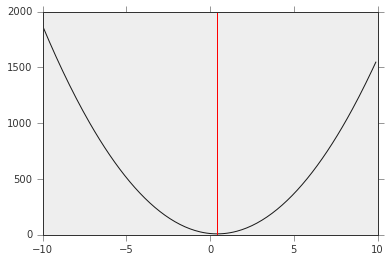

In [15]:
x = np.arange(-10., 10., 0.1)
plt.plot(x, quadratic(x))
plt.axvline(x_min, color='r')

#### Fit a model to data: a simple linear model

In [16]:
def model(x, *p): # for curve_fit
    """ A simple linear model """
    m,b = p
    return m*x + b

def model(p, x): # for leastsq
    """ A simple linear model """
    m,b = p
    return m*x + b

def error_func(p, x, y, sigma_y):
    return (y - model(p,x)) / sigma_y

First we'll generate some data with the model function, then we'll fit it

<Container object of 3 artists>

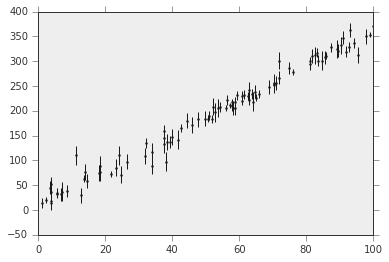

In [18]:
true_p = [3.5, 11.]
x = np.sort(np.random.uniform(0., 100., size=100))
sigma_y = np.random.uniform(5., 20., size=100)
y = model(true_p, x) + np.random.normal(0., sigma_y)
plt.errorbar(x, y, yerr=sigma_y, marker=".", linestyle='none')

`leastsq()` returns the optimal parameters (here, `fit_p`) and an integer that indicates whether the fit succeeded or failed. If `ier` is larger than 4, the fit probably failed.

In [20]:
fit_p, ier = optimize.leastsq(error_func, x0=[1.,0.], 
                              args=(x, y, sigma_y))
print(ier)

1


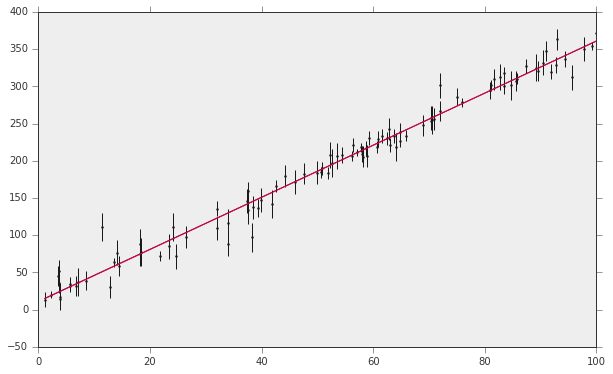

In [23]:
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=sigma_y, marker=".", linestyle='none')
plt.plot(x, model(true_p, x), marker=None, color='b')
plt.plot(x, model(fit_p, x), marker=None, color='r')

----

### Integration

In [24]:
from scipy import integrate

#### Numerically integrate a function from a to b

In [25]:
def simple_func(x):
    return -2.*x + 10

In [27]:
integral, abs_error = integrate.quad(simple_func, 0., 10.)
print("{0} +/- {1}".format(integral, abs_error))

-5.374767776972135e-16 +/- 5.53042002075866e-13


Good, it's consistent with zero!

-----

### Interpolation

In [28]:
from scipy import interpolate

Let's say we have some data:

In [29]:
x = np.sort(np.random.random(size=10))
y = 5.*x**2 + 3.*x - 11

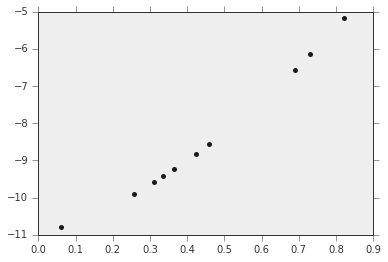

In [31]:
plt.plot(x, y, marker='o', linestyle='none')

What if we want the value of whatever function produced these data at x=0.4?

In [33]:
cubic_func = interpolate.interp1d(x, y, kind='cubic')
linear_func = interpolate.interp1d(x, y, kind='linear')
print(cubic_func(np.array([0.4, 0.5, 0.6])),linear_func(0.4))

[-9.   -8.25 -7.4 ] -8.996064739646323


(-10, -7.5)

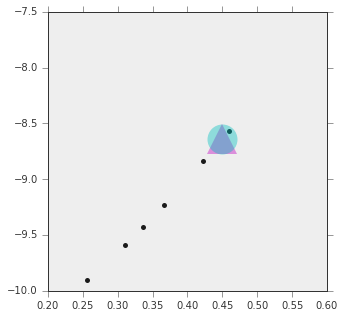

In [34]:
plt.figure(figsize=(5,5))
plt.plot(x, y, marker='o', linestyle='none')
plt.plot(0.45, cubic_func(0.45), marker='^', linestyle='none', 
     color='m', markersize=30, alpha=0.4)
plt.plot(0.45, linear_func(0.45), marker='o', linestyle='none', 
     color='c', markersize=30, alpha=0.4)
plt.xlim(0.2, 0.6)
plt.ylim(-10, -7.5)

------

### ndimage

In [37]:
from scipy import ndimage
import matplotlib.image as mpimg
#import Image 
# requires the Python Imaging Library
#     can install with 'conda install pil' or
#     or 'pip install pil'

In [39]:
image_data = np.array(mpimg.imread("cat.jpg"))
image_data.shape


(200, 200, 3)

In [47]:
r,g,b = image_data.T

#### Filters

Gaussian filter (blur)

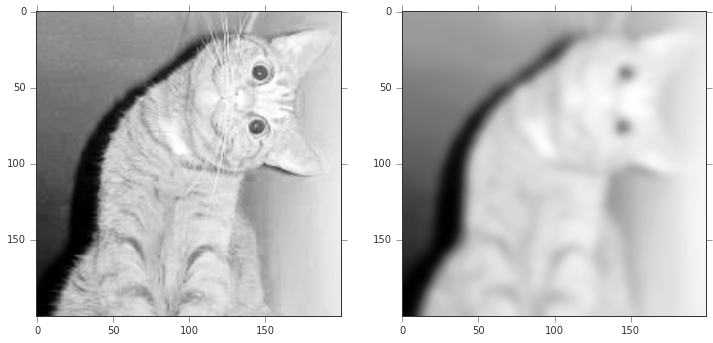

In [50]:
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(r.T, cmap='Greys_r')

plt.subplot(122)
filtered_r = ndimage.filters.gaussian_filter(r, 3.)
plt.imshow(filtered_r.T, cmap='Greys_r')

Maximum filter: takes a moving window of given size and replaces all values with the maximum pixel value in that chunk.

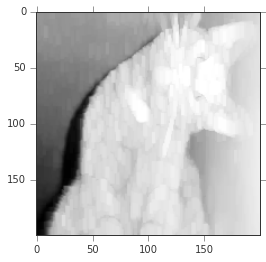

In [52]:
filtered_r = ndimage.filters.maximum_filter(r, size=(3,10))
plt.imshow(filtered_r.T, cmap='Greys_r')

Percentile filter: same as above, but instead of maximum takes the pixel value at whatever percentile you request.

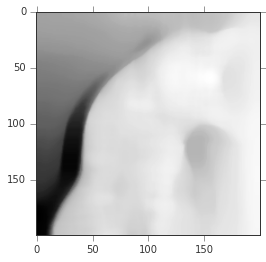

In [53]:
filtered_r = ndimage.filters.percentile_filter(r, percentile=50, size=(25,25))
plt.imshow(filtered_r.T, cmap='Greys_r')

#### image interpolation (e.g. rotation, shift)

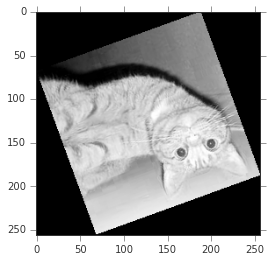

In [54]:
filtered_r = ndimage.interpolation.rotate(r, 70)
plt.imshow(filtered_r.T, cmap='Greys_r')

---

### Read an IDL sav file

In [59]:
from scipy import io

In [60]:
io.readsav("name-of-file.sav")

IOError: [Errno 2] No such file or directory: 'name-of-file.sav'

ERROR: IOError: [Errno 2] No such file or directory: 'name-of-file.sav' [scipy.io.idl]
